In [78]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier


In [77]:
#Loading the data

data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [6]:
#converting the data to a dataframe

df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
#Adding the target variable

df['quality'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


In [51]:
df['quality'].unique()


array([0, 1, 2])

In [19]:
#Checking the shape of the data

df.shape

(178, 15)

There are 178 rows and 15 columns

In [20]:
#Checking the columns in the dataset

df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'wine_class', 'quality'],
      dtype='object')

In [17]:
#Checking for data types

df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
wine_class                        int32
quality                           int32
dtype: object

All data types are as required

In [18]:
#Describing the dataset

df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,2.000000


In [15]:
#Checking for missing values

df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_class                      0
quality                         0
dtype: int64

No nulls

In [16]:
#Checking for duplicates

df.duplicated().sum()

0

No duplicates

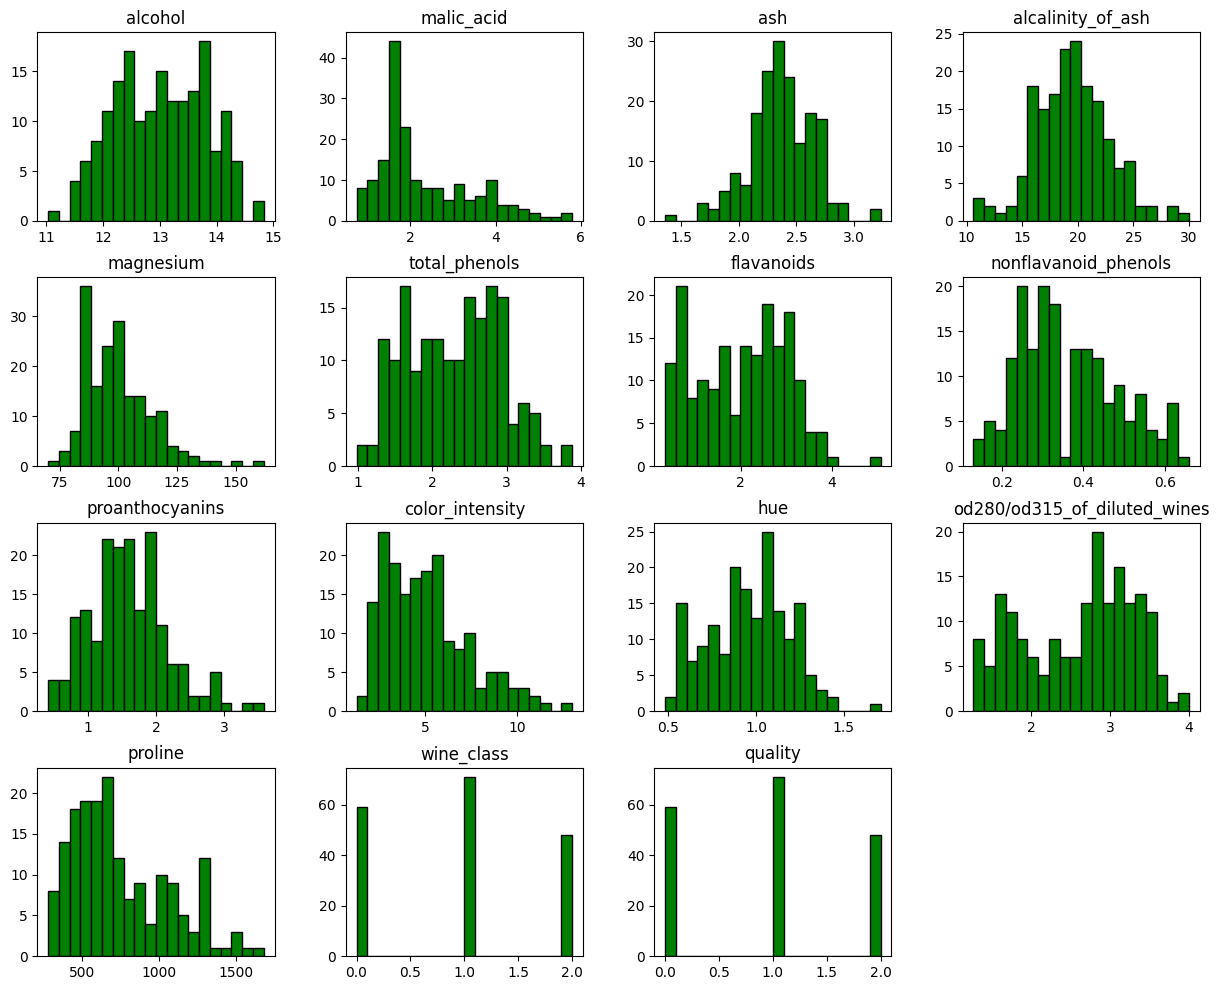

In [13]:
#Checking the distribution of each column

plt.rcParams['figure.figsize'] = (15,12)
df.hist(bins = 20, color = 'green', edgecolor = 'black', grid=False)
plt.show()

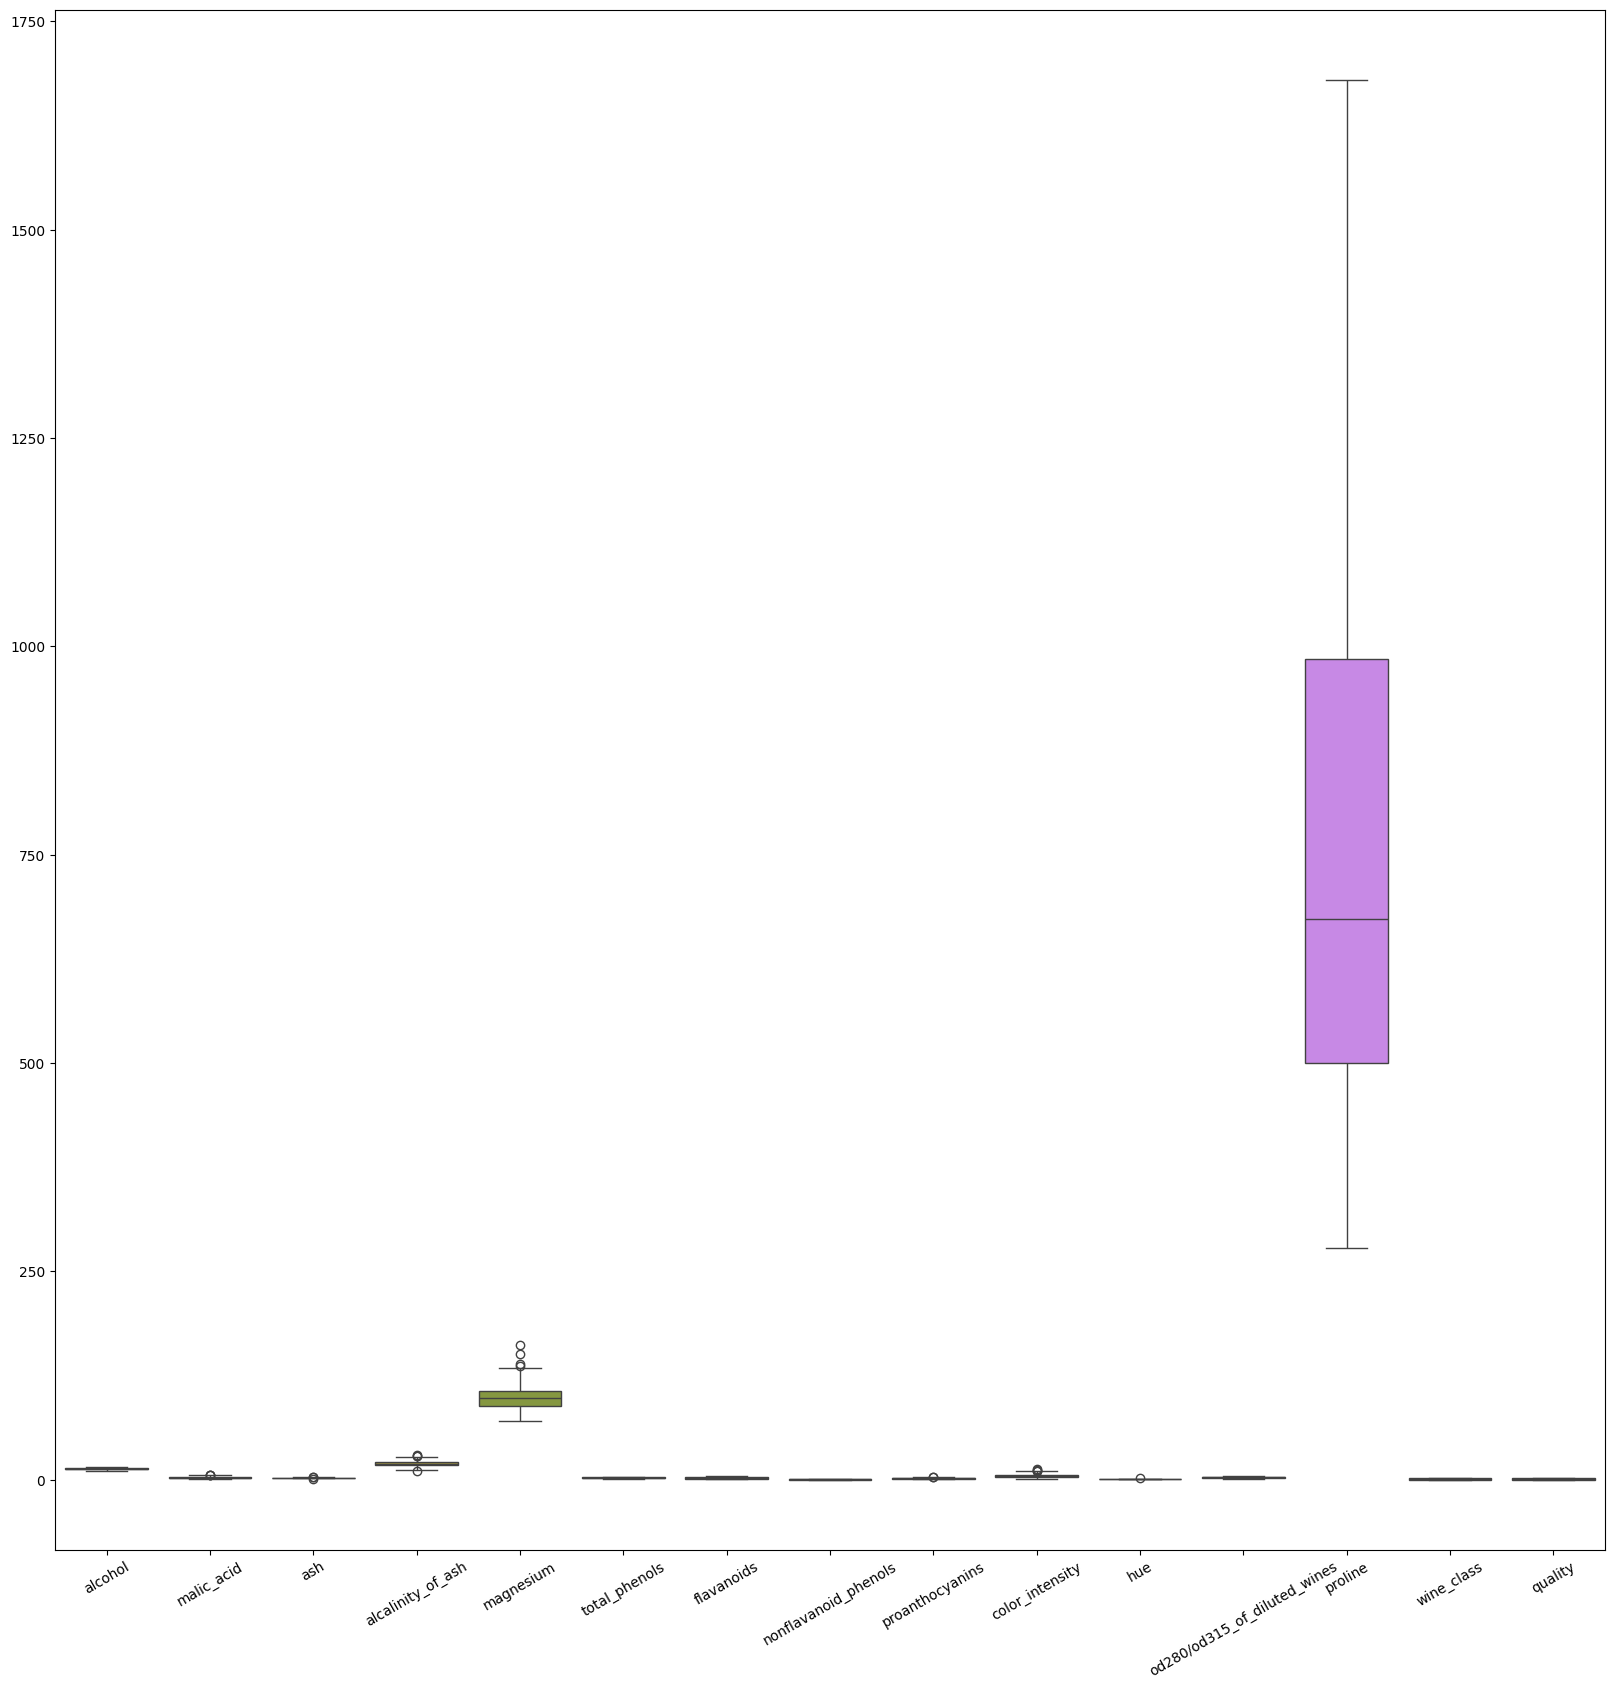

In [26]:
#Checking for outliers

plt.figure(figsize = (20,20))
sns.boxplot(df)
plt.xticks(rotation = 30)
plt.show()

In [46]:
#Removing the outliers in all columns by iterating
df = df.copy()

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3-Q1

    lowerb = Q1 - IQR*1.5
    upperb = Q3 + IQR*1.5

    df = df[(df[i]>=lowerb) & (df[i]<=upperb)]
    
print(df.shape)

(151, 15)


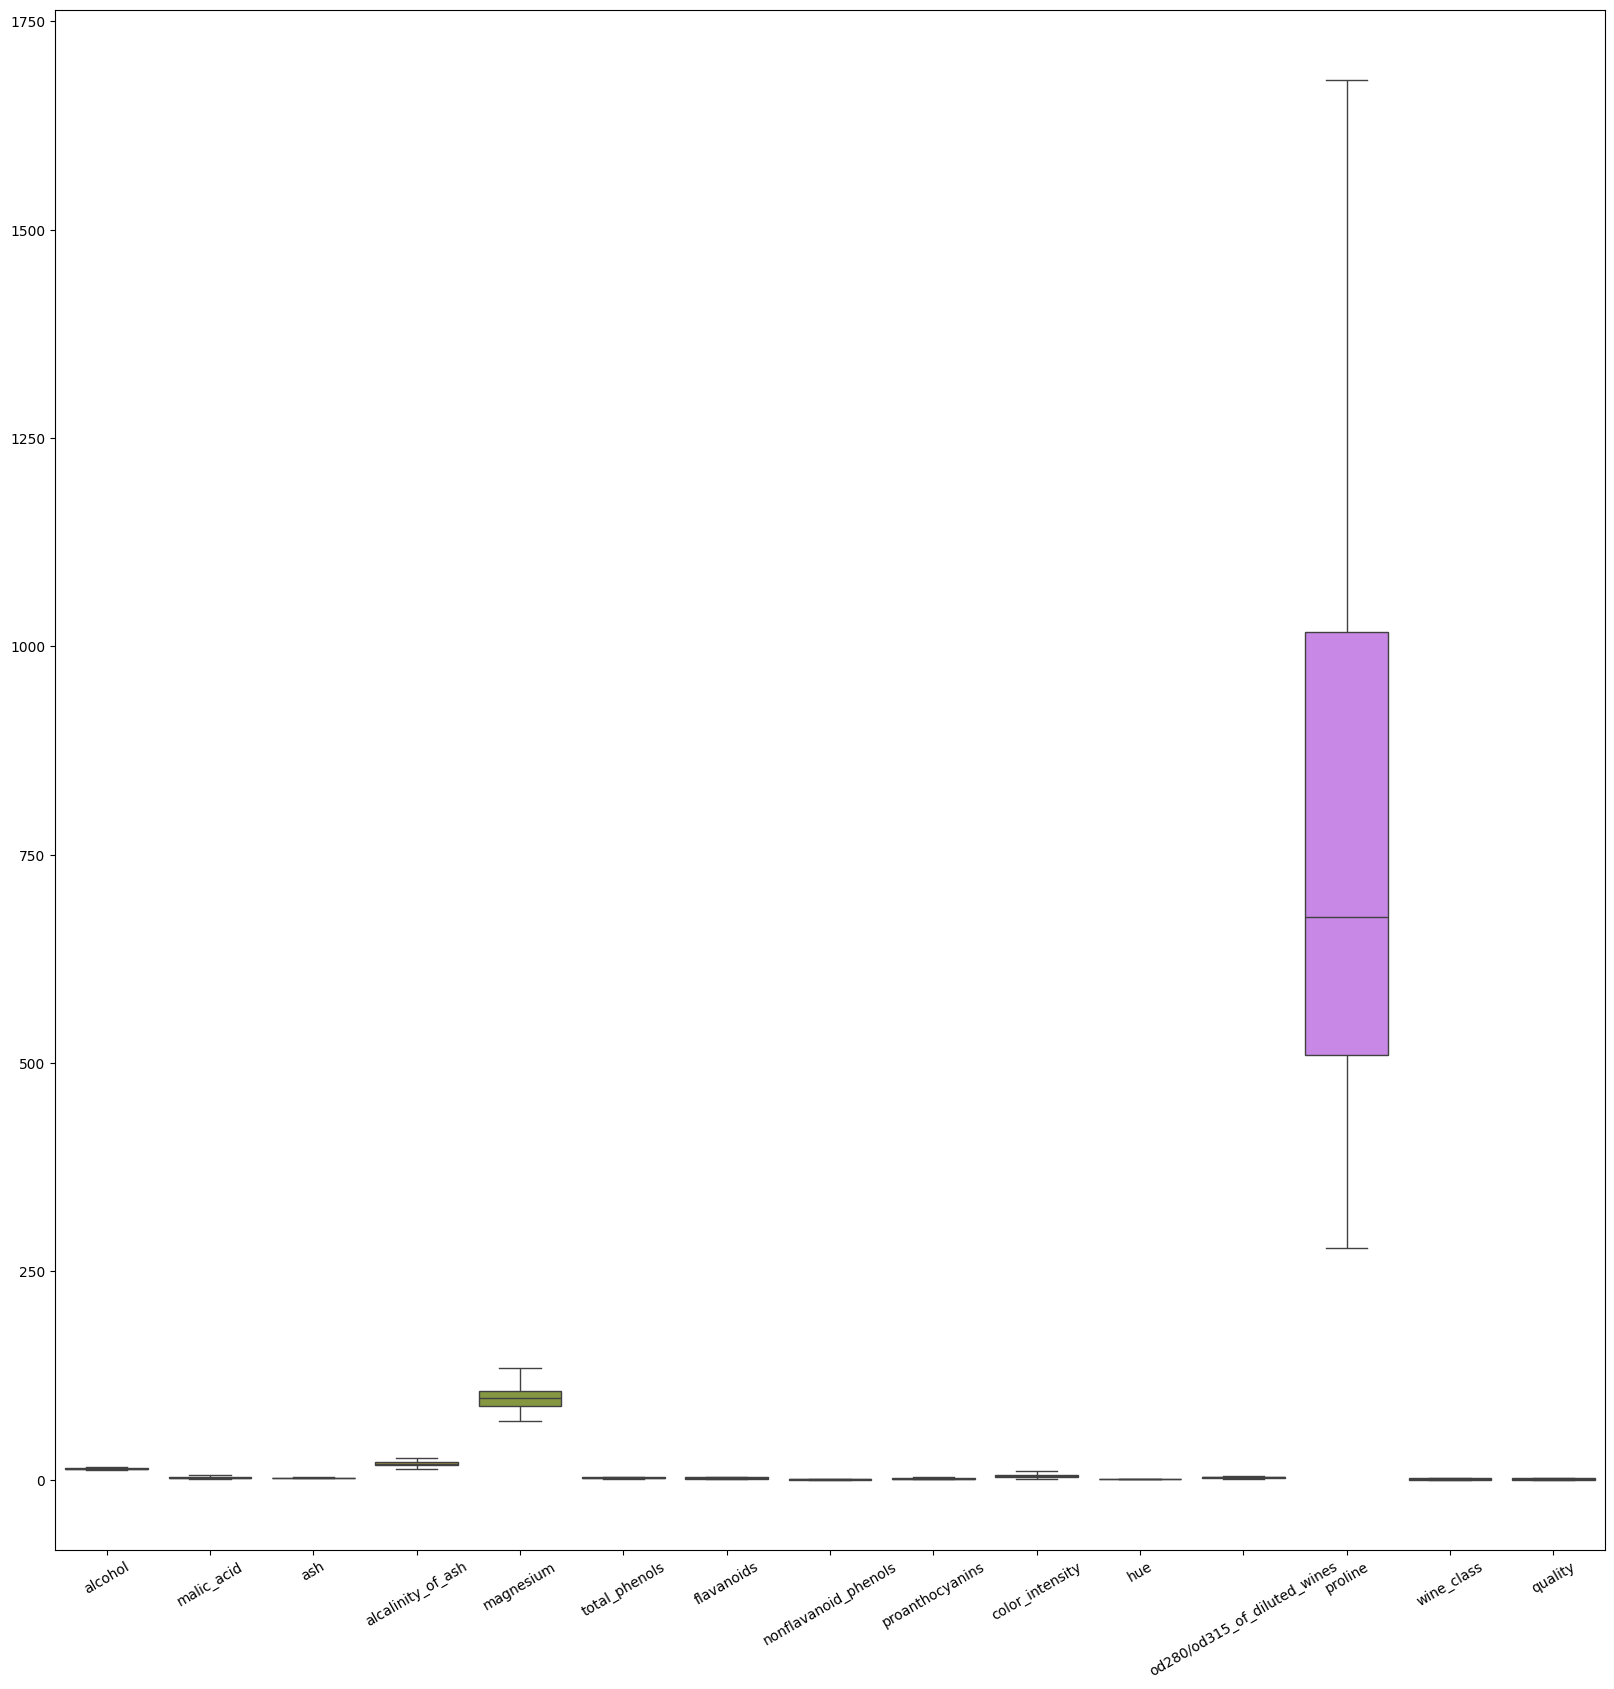

In [55]:
#Checking if our new dataset has ouliers

plt.figure(figsize = (20,20))
sns.boxplot(df)
plt.xticks(rotation = 30)
plt.show()

No outliers can be seen

In [48]:
#Correlation matrix for variable relationships

corr_matrix = df.corr()
corr_matrix


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,quality
alcohol,1.000000,0.140438,0.247432,-0.328328,0.438036,0.330538,0.305749,-0.202078,0.227018,0.552613,-0.034955,0.131391,0.657857,-0.365509,-0.365509
malic_acid,0.140438,1.000000,0.111381,0.246602,0.010563,-0.379966,-0.473482,0.296000,-0.281330,0.336965,-0.576275,-0.427686,-0.169459,0.459431,0.459431
ash,0.247432,0.111381,1.000000,0.232330,0.411004,0.152090,0.111623,0.003891,0.084315,0.222404,0.040990,0.006895,0.299166,-0.112257,-0.112257
alcalinity_of_ash,-0.328328,0.246602,0.232330,1.000000,-0.259450,-0.454708,-0.485635,0.300078,-0.280066,-0.044255,-0.267505,-0.382385,-0.490315,0.571195,0.571195
magnesium,0.438036,0.010563,0.411004,-0.259450,1.000000,0.280016,0.251020,-0.285053,0.172626,0.351406,-0.003945,0.051854,0.459537,-0.276296,-0.276296
total_phenols,0.330538,-0.379966,0.152090,-0.454708,0.280016,1.000000,0.881709,-0.500848,0.643326,-0.051382,0.475006,0.704841,0.529539,-0.754417,-0.754417
flavanoids,0.305749,-0.473482,0.111623,-0.485635,0.251020,0.881709,1.000000,-0.593111,0.737064,-0.154874,0.588148,0.784846,0.547962,-0.886053,-0.886053
nonflavanoid_phenols,-0.202078,0.296000,0.003891,0.300078,-0.285053,-0.500848,-0.593111,1.000000,-0.429855,0.092421,-0.261709,-0.514965,-0.342773,0.501463,0.501463
proanthocyanins,0.227018,-0.281330,0.084315,-0.280066,0.172626,0.643326,0.737064,-0.429855,1.000000,-0.041739,0.356258,0.602159,0.401877,-0.622596,-0.622596
color_intensity,0.552613,0.336965,0.222404,-0.044255,0.351406,-0.051382,-0.154874,0.092421,-0.041739,1.000000,-0.507928,-0.403718,0.358692,0.219863,0.219863


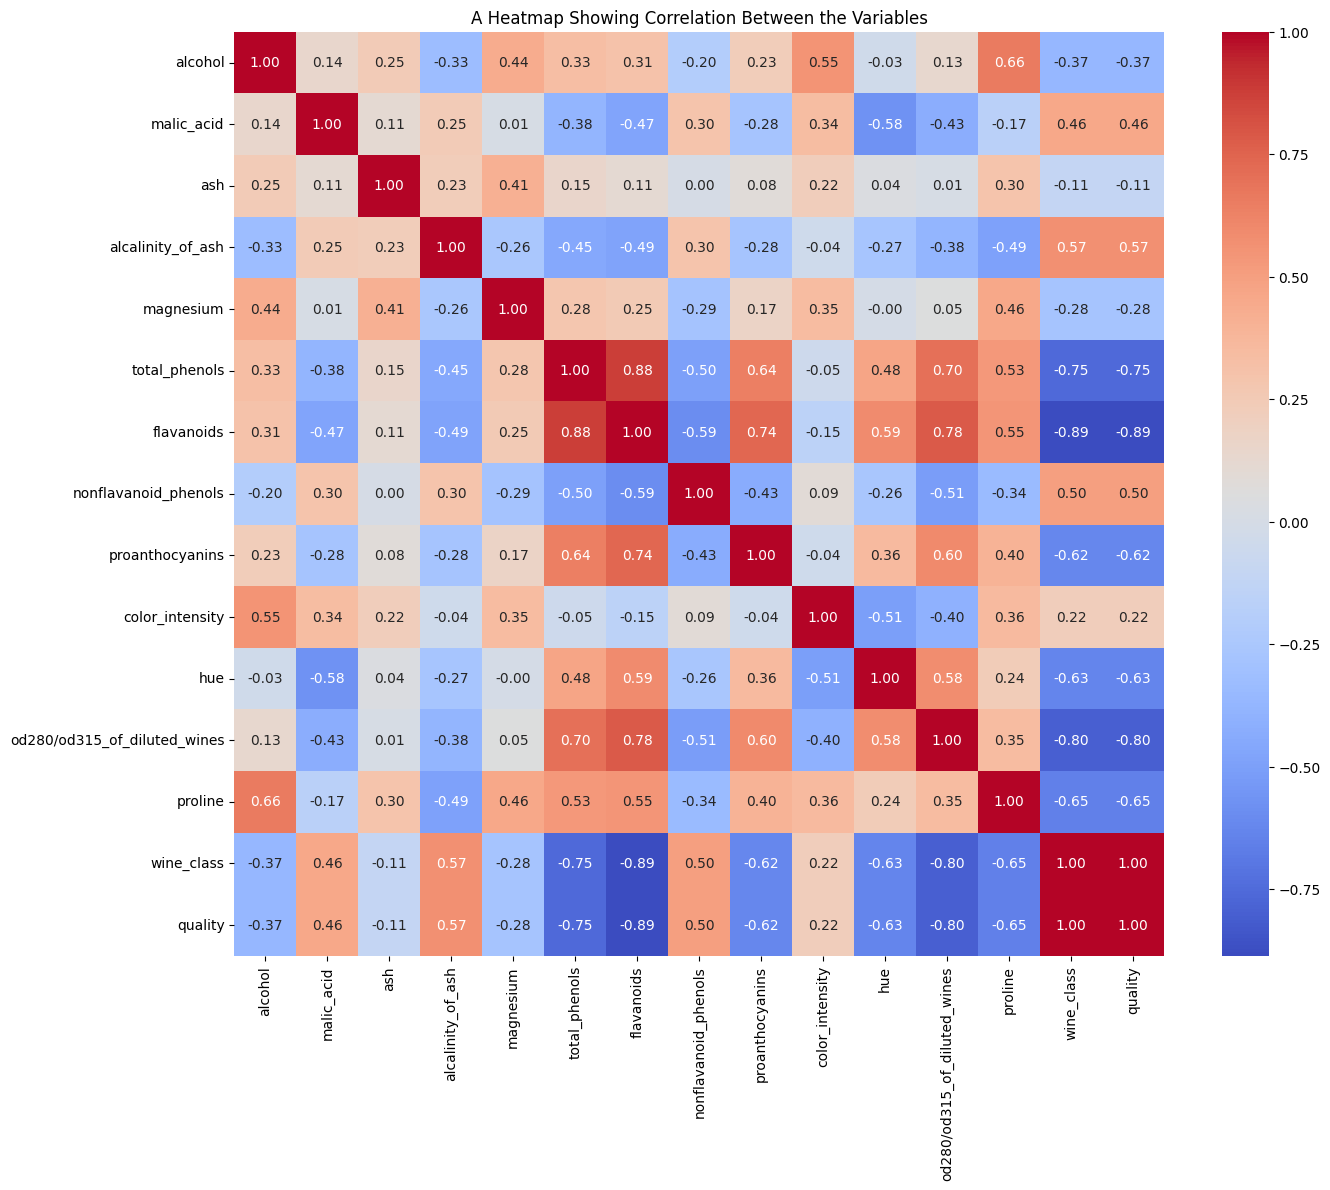

In [66]:
#Visualizing the correlation matrix using a heatmap

sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('A Heatmap Showing Correlation Between the Variables')
plt.show()

In [83]:
#Feature Engineering

x = df[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']]
y = df['quality']

#Splitting the features and target columns

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#Getting the model

model = GradientBoostingClassifier()

#Fitting the model

model.fit(x_train, y_train)

#Making predictions

y_predict = model.predict(x_test)

#Getting the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print('The accuracy of the model = ', round(accuracy*100,2), '%')

#Getting the cross validation score of the ,=model

score = cross_val_score(model, x_train,y_train, cv =5, n_jobs = -1).mean()
print('\nThe cross validation score of the model = ', round(score*100,2), '%')

#Getting the confusion matrix

matrix = confusion_matrix(y_predict, y_test)
print('\nThis is the confusion matrix of the model:\n', matrix)

The accuracy of the model =  93.55 %

The cross validation score of the model =  93.33 %

This is the confusion matrix of the model:
 [[10  1  0]
 [ 1 10  0]
 [ 0  0  9]]
